In [ ]:
import os

if not os.getcwd().endswith("src"):
    %cd ..
%pwd

/home/xqz-u/master/FACT/FACT/src


'/home/xqz-u/master/FACT/FACT/src'

In [ ]:
import pandas as pd

import config
import plot
import sources_of_envy

In [ ]:
metrics = sources_of_envy.do_envy_from_mispecification()
metrics

{'lastfm': {'mean_envy': {64: 0.0001342113,
   256: 7.286528e-05,
   4: 0.00043151432,
   8: 0.0003858279,
   128: 0.00010950758,
   32: 0.0001606485,
   2: 0.00040305665,
   1: 0.0002951046,
   6: 1.8779431e-09,
   16: 0.0002720793},
  'prop_eps_envy': {64: 0.0,
   256: 0.0,
   4: 0.0,
   8: 0.0,
   128: 0.0,
   32: 0.0,
   2: 0.0,
   1: 0.0,
   6: 0.0,
   16: 0.0}},
 'movielens': {'mean_envy': {64: 0.00044677305,
   256: 0.000599399,
   4: 0.0015320089,
   8: 0.0009227462,
   128: 0.00048691157,
   32: 0.00043825162,
   2: 0.002754531,
   1: 0.003061911,
   16: 0.00043108384},
  'prop_eps_envy': {64: 0.0,
   256: 0.0,
   4: 0.0,
   8: 0.0,
   128: 0.0,
   32: 0.0,
   2: 0.0,
   1: 0.0,
   16: 0.0}}}

In [ ]:
df = pd.DataFrame()

for dataset in metrics:
    metric_df = pd.DataFrame(metrics[dataset]).reset_index().rename(columns={"index": "factors"})
    metric_df["dataset"] = dataset
    df = pd.concat((df, metric_df))

df

,factors,mean_envy,prop_eps_envy,dataset
0,64,1.342113e-04,0.0,lastfm
1,256,7.286528e-05,0.0,lastfm
2,4,4.315143e-04,0.0,lastfm
3,8,3.858279e-04,0.0,lastfm
4,128,1.095076e-04,0.0,lastfm
5,32,1.606485e-04,0.0,lastfm
6,2,4.030566e-04,0.0,lastfm
7,1,2.951046e-04,0.0,lastfm
8,6,1.877943e-09,0.0,lastfm
9,16,2.720793e-04,0.0,lastfm


<AxesSubplot: xlabel='factors', ylabel='prop_eps_envy'>

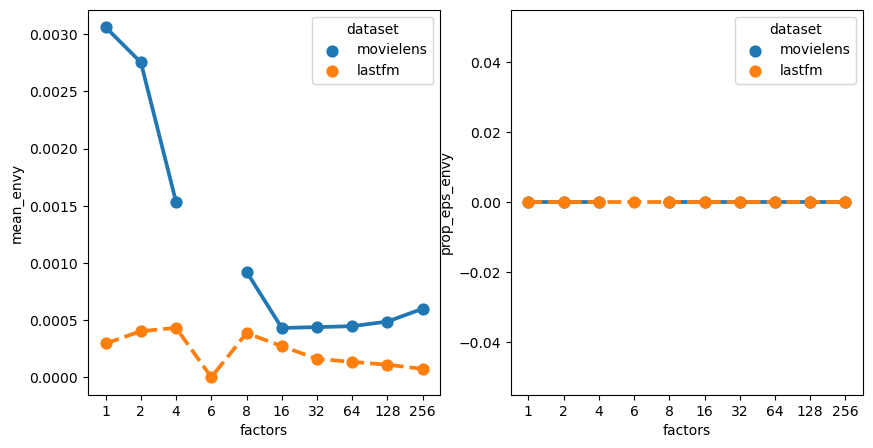

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.pointplot(data=df, x="factors", y="mean_envy", hue="dataset", linestyles=["-", "--"], ax=axes[0])
sns.pointplot(data=df, x="factors", y="prop_eps_envy", hue="dataset", linestyles=["-", "--"], ax=axes[1])